# Decision Trees
## Multi-output problems

A multi-output problem is a supervised learning problem with several outputs to predict, that is when **Y is a 2d array** of shape (`n_samples`, `n_outputs`).

When there is no correlation between the outputs, a very simple way to solve this kind of problem is to build n independent models, i.e. one for each output, and then to use those models to independently predict each one of the n outputs. However, because it is likely that the output values related to the same input are themselves correlated, an often better way is to **build a single model capable of predicting simultaneously all n outputs**. First, it requires lower training time since only a single estimator is built. Second, the generalization accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes:

- Store n output values in leaves, instead of 1;
- Use splitting criteria that compute the average reduction across all n outputs.

This module offers support for multi-output problems by implementing this strategy in both `DecisionTreeClassifier` and `DecisionTreeRegressor`. If a decision tree is fit on an output array Y of shape (`n_samples`, `n_outputs`) then the resulting estimator will:

- Output n_output values upon predict;
- Output a list of n_output arrays of class probabilities upon predict_proba.

The use of multi-output trees for regression is demonstrated in Multi-output Decision Tree Regression. In this example, the input X is a single real value and the outputs Y are the sine and cosine of X.

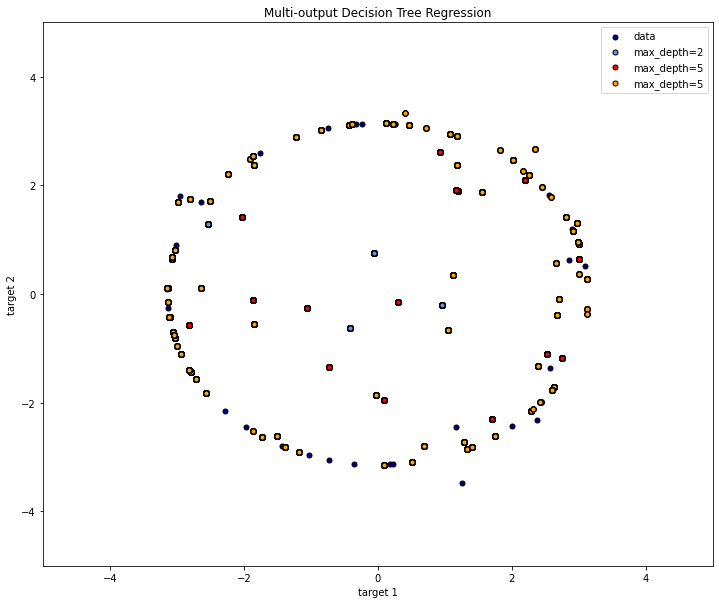

In [35]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200*rng.rand(100,1) - 100, axis = 0)
#.T since shape is (2,100) and I want
y = np.array([np.pi*np.sin(X).ravel(), np.pi*np.cos(X).ravel()]).T
#y1 = np.array([np.pi*np.sin(X), np.pi*np.cos(X)]) 
''' y1.shape = (2,100,1) perchè entrambi partono da shape (100,1)
    e vengono accorpati in una altra dimensione, il 2 davanti è per quello    
'''
#::5 pick every 5 PAIRS of points. I want every value in a row, hence I have the ",:]"
y[::5, :] += 0.5 - rng.rand(20,2)

#Fit regression model
regr1 = DecisionTreeRegressor(max_depth=2).fit(X,y)
regr2 = DecisionTreeRegressor(max_depth=5).fit(X,y)
regr3 = DecisionTreeRegressor(max_depth=8).fit(X,y)

#Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)
y_3 = regr3.predict(X_test)

#Plot the results
plt.figure(figsize=(12,10))
s = 25
plt.scatter(y[:,0],y[:,1], c='navy', s=s, edgecolor='black', label='data')
plt.scatter(
    y_1[:,0], y_1[:,1],c='cornflowerblue',s=s,edgecolor='black', label='max_depth=2'
)
plt.scatter(
    y_2[:,0], y_2[:,1],c='red',s=s,edgecolor='black', label='max_depth=5'
)
plt.scatter(
    y_3[:,0], y_3[:,1],c='orange',s=s,edgecolor='black', label='max_depth=5'
)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

In [36]:
y1.shape

NameError: name 'y1' is not defined

In [ ]:
X.shape

(100, 1)

In [ ]:
print(X.shape)
(np.pi*np.sin(X)).shape

(100, 1)


(100, 1)

In [ ]:
prov_y = rng.rand(20,2)
prov_y

array([[0.62971751, 0.21017401],
       [0.75275555, 0.06653648],
       [0.2603151 , 0.80475456],
       [0.19343428, 0.63946088],
       [0.52467031, 0.92480797],
       [0.26329677, 0.06596109],
       [0.73506596, 0.77217803],
       [0.90781585, 0.93197207],
       [0.01395157, 0.23436209],
       [0.61677836, 0.94901632],
       [0.95017612, 0.55665319],
       [0.91560635, 0.64156621],
       [0.39000771, 0.48599067],
       [0.60431048, 0.54954792],
       [0.92618143, 0.91873344],
       [0.39487561, 0.96326253],
       [0.17395567, 0.12632952],
       [0.13507916, 0.50566217],
       [0.02152481, 0.94797021],
       [0.82711547, 0.01501898]])

In [ ]:
prov_y.shape

(20, 2)

In [ ]:
prov_y[::5, :]

array([[0.62971751, 0.21017401],
       [0.26329677, 0.06596109],
       [0.95017612, 0.55665319],
       [0.39487561, 0.96326253]])

## Face completion with a multi-output estimators
This example shows the use of multi-output estimator to complete images. The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. The next columns illustrate how extremely randomized trees, k nearest neighbors, linear regression and ridge regression complete the lower half of those faces.

----------------
### Dataset characteristics
There are 10 different images of each of 40 distinct subjects -> *400 images*. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

-----------

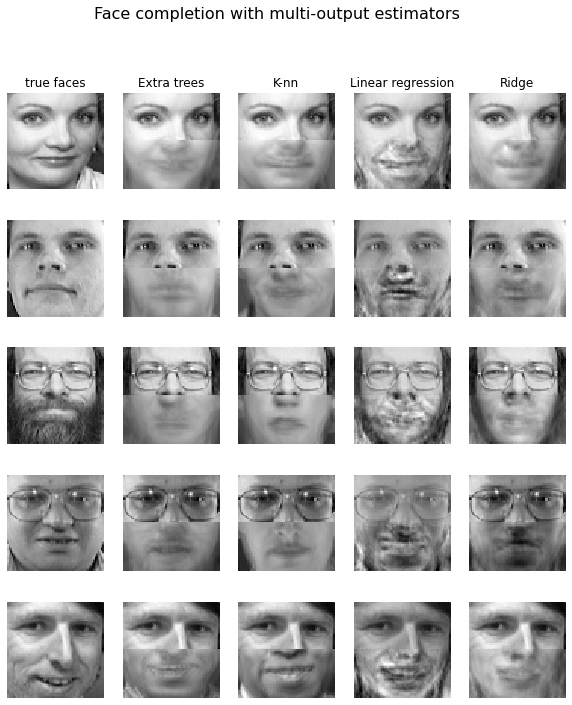

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

#Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30] # Test on independent people

#Test on a subset of people
n_faces = 5
rng = check_random_state(4) #set rng
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
#Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2] #till the half
#Lower half of the faces
y_train = train[:, n_pixels // 2 :] #from the half till the end

X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]


#Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

#plot the completed faces
image_shape = (64,64)

n_cols = 1 + len(ESTIMATORS) #to take into account the original image
plt.figure(figsize=(2.0*n_cols, 2.26*n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    
    if i: #a way to exclude first element (the 0)
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        #same as above, but we add the title
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='true faces')
        
    sub.axis('off')
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest'
    )
    
    for j, estim in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[estim][i]))
        
        if i:
            #Three integers (*nrows*, *ncols*, *index*).
            sub = plt.subplot(n_faces, n_cols, i* n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 +j, title=estim)
            
        sub.axis('off')
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation='nearest',
        )
plt.show()

-------------
Trials

In [ ]:
print("data.shape", data.shape)
print("type(data)", type(data))
print("len(targets < 30)", len(targets < 30))
print("sum(targets < 30)", sum(targets < 30))
print("face_ids = rng.randint(test.shape[0], size=(n_faces,))", rng.randint(test.shape[0], size=(n_faces,)))

data.shape (400, 4096)
type(data) <class 'numpy.ndarray'>
len(targets < 30) 400
sum(targets < 30) 300
face_ids = rng.randint(test.shape[0], size=(n_faces,)) [0 2 1 2 4]


In [ ]:
lista = list(range(10))
for i in lista:
    if i:
        print('ahi ahi', i)
    else:
        print('boh')
print(lista)

boh
ahi ahi 1
ahi ahi 2
ahi ahi 3
ahi ahi 4
ahi ahi 5
ahi ahi 6
ahi ahi 7
ahi ahi 8
ahi ahi 9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
print("sorted(ESTIMATORS)", sorted(ESTIMATORS))
print("ESTIMATORS", ESTIMATORS)


sorted(ESTIMATORS) ['Extra trees', 'K-nn', 'Linear regression', 'Ridge']
ESTIMATORS {'Extra trees': ExtraTreesRegressor(max_features=32, n_estimators=10, random_state=0), 'K-nn': KNeighborsRegressor(), 'Linear regression': LinearRegression(), 'Ridge': RidgeCV(alphas=array([ 0.1,  1. , 10. ]))}


In [ ]:
print(image_shape)

(64, 64)


In [ ]:
for i in range(n_faces):
    print("i\t",i)
    for j, estim in enumerate(sorted(ESTIMATORS)):
        print("n_faces, n_cols, i* n_cols + 2 + j\t", n_faces, n_cols, i* n_cols + 2 + j)

i	 0
n_faces, n_cols, i* n_cols + 2 + j	 5 5 2
n_faces, n_cols, i* n_cols + 2 + j	 5 5 3
n_faces, n_cols, i* n_cols + 2 + j	 5 5 4
n_faces, n_cols, i* n_cols + 2 + j	 5 5 5
i	 1
n_faces, n_cols, i* n_cols + 2 + j	 5 5 7
n_faces, n_cols, i* n_cols + 2 + j	 5 5 8
n_faces, n_cols, i* n_cols + 2 + j	 5 5 9
n_faces, n_cols, i* n_cols + 2 + j	 5 5 10
i	 2
n_faces, n_cols, i* n_cols + 2 + j	 5 5 12
n_faces, n_cols, i* n_cols + 2 + j	 5 5 13
n_faces, n_cols, i* n_cols + 2 + j	 5 5 14
n_faces, n_cols, i* n_cols + 2 + j	 5 5 15
i	 3
n_faces, n_cols, i* n_cols + 2 + j	 5 5 17
n_faces, n_cols, i* n_cols + 2 + j	 5 5 18
n_faces, n_cols, i* n_cols + 2 + j	 5 5 19
n_faces, n_cols, i* n_cols + 2 + j	 5 5 20
i	 4
n_faces, n_cols, i* n_cols + 2 + j	 5 5 22
n_faces, n_cols, i* n_cols + 2 + j	 5 5 23
n_faces, n_cols, i* n_cols + 2 + j	 5 5 24
n_faces, n_cols, i* n_cols + 2 + j	 5 5 25


-------------

# Tips on practical use¶
- Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.
- Consider performing dimensionality reduction (**PCA**, **ICA**, or **Feature selection**) beforehand to give your tree a better chance of finding features that are discriminative.
- Understanding the decision tree structure will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.
- Visualise your tree as you are training by using the `export` function. Use `max_depth=3` as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.
- Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use `max_depth` to control the size of the tree to prevent overfitting.
- Use `min_samples_split` or `min_samples_leaf` to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try `min_samples_leaf=5` as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. While `min_samples_split` can create arbitrarily small leaves, `min_samples_leaf` guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, `min_samples_leaf=1` is often the best choice.

    Note that `min_samples_split` considers samples directly and independent of `sample_weight`, if provided (e.g. a node with m weighted samples is still treated as having exactly m samples). Consider `min_weight_fraction_leaf` or `min_impurity_decrease` if accounting for sample weights is required at splits.
- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (`sample_weight`) for each class to the same value. Also note that weight-based pre-pruning criteria, such as `min_weight_fraction_leaf`, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like `min_samples_leaf`.
- If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as `min_weight_fraction_leaf`, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.
- All decision trees use `np.float32` arrays internally. If training data is not in this format, a copy of the dataset will be made.
- If the input matrix X is very sparse, it is recommended to convert to sparse `csc_matrix` before calling fit and sparse `csr_matrix` before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

-----------

# Post pruning decision trees with cost complexity pruning
The `DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and max_depth to prevent a tree from overfitting. Cost complexity pruning provides another option to control the size of a tree. In `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

## Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of `ccp_alpha` could be appropriate, scikit-learn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [17]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [3]:
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'total impurity vs alpha for training set')

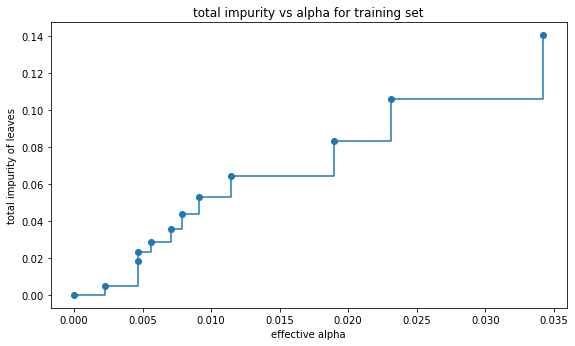

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5/2,10.5/2)
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('total impurity vs alpha for training set')

-----------
If I don't leave the maximum effective alpha it would be like this

Text(0.5, 1.0, 'total impurity vs alpha for training set')

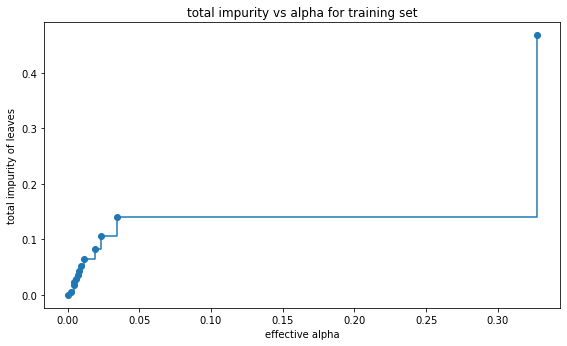

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5/2,10.5/2)
ax.plot(ccp_alphas[:], impurities[:], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('total impurity vs alpha for training set')

---------

Next, we train a decision tree using the effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.



In [19]:
clfs = [] #1 classifier for each alpha parameter of pruning
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

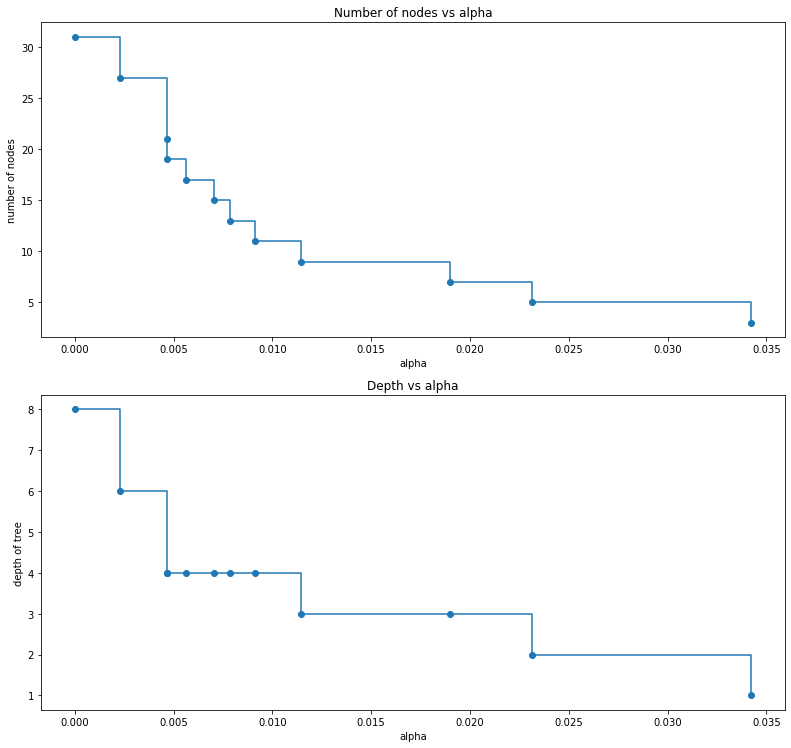

In [20]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18.5*0.6,10.5)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Accuracy vs alpha for training and testing sets

When `ccp_alpha` is set to zero and keeping the other default parameters of `DecisionTreeClassifier`, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha=0.015` maximizes the testing accuracy.

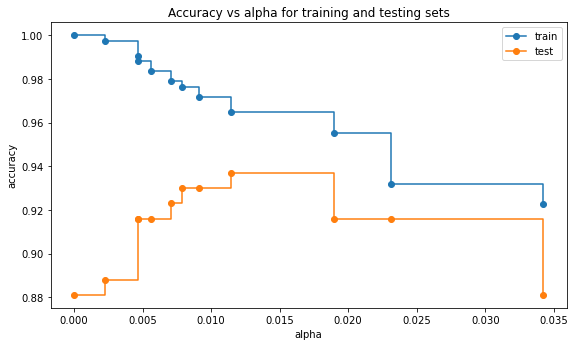

In [24]:
train_scores = [clf.score(X_train, y_train) for clf in clfs] #return accuracies
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
fig.set_size_inches(18.5/2.,10.5/2.)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [14]:
node_counts

[31, 27, 21, 19, 17, 15, 13, 11]

In [15]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475])